In [298]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
from obspy import UTCDateTime
from obspy.clients.fdsn.client import Client
from tqdm import tqdm
import logging
from datetime import datetime

In [342]:
client = Client("IRIS")
starttime = UTCDateTime("2015-01-01T00:00:00")
endtime = UTCDateTime(datetime.now())
indo_coords = dict(minlatitude=-11, maxlatitude=6, minlongitude=95, maxlongitude=141)
maxdepth = 20
maxrad = 5
year = starttime.strftime('%Y')
endyear = endtime.strftime('%Y')

In [343]:
cat = client.get_events(
    starttime=starttime, endtime=endtime, 
    mindepth=0.05, maxdepth=maxdepth, minmagnitude=2, **indo_coords
    )

event_dict = {'id':[], 'origin_time': [], 'latitude': [], 'longitude': [], 'depth': [], 'magnitude':[], 'magnitude_type':[]}
for ev in cat.events[1:]:
    ev_id = str(ev.resource_id).split('=')[-1]
    event_dict["id"].append(ev_id)
    event_dict["origin_time"].append(ev.origins[0].time)
    event_dict["latitude"].append(ev.origins[0].latitude)
    event_dict["longitude"].append(ev.origins[0].longitude)
    event_dict["depth"].append(ev.origins[0].depth/1000)
    event_dict["magnitude"].append(ev.magnitudes[0].mag)
    event_dict["magnitude_type"].append(ev.magnitudes[0].magnitude_type)
    
df_ev = pd.DataFrame(event_dict)
df_ev.to_csv(f'../data/indonesia/{year}.{endyear}.{maxdepth}.{maxrad}.metadata_iris.csv', index=False)

cat

4447 Event(s) in Catalog:
2023-04-15T04:39:40.038000Z |  +0.895,  +99.381 | 4.4  mb
2023-04-13T23:00:32.905000Z |  +5.301, +127.871 | 4.7  mb
...
2015-01-01T19:21:41.100000Z |  -2.140, +120.670 | 3.5  MLv
2015-01-01T05:13:08.100000Z |  -1.990, +120.410 | 3.4  MLv
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [344]:
df_ev = pd.read_csv(f'../data/indonesia/{year}.{endyear}.{maxdepth}.{maxrad}.metadata_iris.csv')
df_ev

id                  origin_time  latitude  longitude   depth  \
0     11683534  2023-04-13T23:00:32.905000Z    5.3006   127.8707  10.000   
1     11679523  2023-04-06T00:32:02.986000Z   -0.4926   122.2314  10.000   
2     11684004  2023-04-04T00:29:13.947000Z    2.5017   129.0607  10.000   
3     11678407  2023-04-03T16:17:57.084000Z   -7.8634   118.7183   9.969   
4     11678152  2023-04-03T02:03:01.269000Z   -0.9510   126.8991  10.000   
...        ...                          ...       ...        ...     ...   
4441  10568624  2015-01-04T03:15:04.700000Z   -7.8600   106.5000  10.000   
4442  10567860  2015-01-03T11:00:09.890000Z    2.6615    95.0030  18.000   
4443  10567505  2015-01-03T01:40:56.000000Z   -2.1400   120.6900  10.000   
4444  10566277  2015-01-01T19:21:41.100000Z   -2.1400   120.6700  10.000   
4445  10565740  2015-01-01T05:13:08.100000Z   -1.9900   120.4100  17.000   

      magnitude magnitude_type  
0           4.7             mb  
1           5.2            Mww  
2           4.4             mb  
3           4.4             mb  
4           4.5             mb  
...         ...            ...  
4441        3.8            MLv  
4442        4.2             mb  
4443        3.7            MLv  
4444        3.5            MLv  
4445        3.4            MLv  

[4446 rows x 7 columns]

In [346]:
# station_dict = {'network':[], 'station':[], 'latitude':[], 'longitude':[], 'event_id': []}
# event_get_station_error = []
# for i, row in tqdm(list(df_ev.iterrows())[:], f'get near station from events with {maxrad} degree'):
#     try:
#         inv = client.get_stations(network="*", station="*", channel="BH?", latitude=row['latitude'], longitude=row['longitude'], maxradius=maxrad)
#         for net in inv:
#             for sta in net:
#                 if sta.code not in station_dict['station']:
#                     station_dict['network'].append(net.code)
#                     station_dict['station'].append(sta.code)
#                     station_dict['latitude'].append(sta.latitude)
#                     station_dict['longitude'].append(sta.longitude)
#                     station_dict['event_id'].append([row.id])
#                 else:
#                     sid = station_dict['station'].index(sta.code)
#                     ev_id = station_dict['event_id'][sid]
#                     if row.id not in ev_id:
#                         ev_id.append(row.id)  
#     except Exception as e:
#         df_ev = df_ev.drop(i)
#         event_get_station_error.append(f'{row.id}: {e}')
#         # print(f'{row.id}: {e}')

# print(f'total station before availability check: {len(station_dict["station"])}')

# df_sta = pd.DataFrame(station_dict)
# df_sta['sum_ev'] = df_sta.event_id.apply(lambda x: len(x))
# df_sta['event_id'] = df_sta.event_id.apply(tuple)
# df_sta = df_sta.sort_values(by='sum_ev', ascending=False).reset_index(drop=True)
# df_sta.to_csv(f'../data/indonesia/{year}.{endyear}.{maxdepth}.{maxrad}.stations.csv',index=False)

df_sta = pd.read_csv(f'../data/indonesia/stations.{year}.{endyear}.{maxdepth}.{maxrad}.csv')
print(f'potential total events data: {df_sta.sum_ev.sum()}')
df_sta

potential total events data: 60363


network station  latitude   longitude  \
0        GE    TNTI   0.77180  127.366699   
1        GE    LUWI  -1.04180  122.771698   
2        II    KAPI  -5.01420  119.751700   
3        GE    FAKI  -2.91925  132.248886   
4        YS    PAGL  -8.50910  120.491600   
..      ...     ...       ...         ...   
193      TM    SURA   9.16634   99.629509   
194      7B    SC01 -13.40000  131.507004   
195      MY     KSM   1.47330  110.308296   
196      MY     SBM   2.45290  112.213997   
197      II    COCO -12.19010   96.834900   

                                              event_id  sum_ev  
0    (11683534, 11684004, 11678152, 11677719, 11680...    1140  
1    (11679523, 11678152, 11674088, 11664450, 11676...     934  
2    (11678407, 11677983, 11676456, 11674088, 11664...     868  
3    (11678004, 11677989, 11680625, 11675732, 11682...     820  
4    (11678407, 11677983, 11676456, 11659560, 11659...     719  
..                                                 ...     ...  
193  (11647783, 11640719, 11346676, 10952334, 10886...       5  
194  (11657519, 11564531, 11549313, 11552519, 10637...       5  
195            (11574580, 11525556, 5186218, 10744367)       4  
196                     (11525556, 11047507, 10744367)       3  
197                                        (10388851,)       1  

[198 rows x 6 columns]

In [466]:
no_wave_station = []
def check_avail(df):
    logging.basicConfig(filename='status.log', level=logging.DEBUG, filemode='w')
    logging.shutdown()
    df_sta = df.copy()
    for i, row in tqdm(list(df_sta.iterrows())[:], f'check station availability'):
        if row.station not in no_wave_station:
            try:
                client.get_waveforms(
                    network=row.network, station=row.station, location="*",
                    channel='BH?', starttime=starttime, endtime=starttime+1)
            except Exception as e:
                logging.error(f'{UTCDateTime(datetime.now())} - {row.network}.{row.station} | {e}')
                no_wave_station.append(row.station)
                df_sta = df_sta.drop(i)

    print(f'total unavailable requested data: {len(no_wave_station)}')
    
    file_handler = logging.FileHandler('status.log')
    file_handler.close()
    return df_sta.reset_index(drop=True)

In [467]:
df_sta_av = check_avail(df_sta)
# df_sta_av.to_csv(f'../data/indonesia/{year}.{endyear}.{maxdepth}.{maxrad}.stations_filtered.csv',index=False)
# df_sta_av = pd.read_csv(f'../data/indonesia/stations.{year}.{endyear}.{maxdepth}.{maxrad}_filtered.csv')

print(f'potential total events data: {df_sta_av.sum_ev.sum()}')
df_sta_av

check station availability: 100%|██████████| 198/198 [02:42<00:00,  1.22it/s]


total unavailable requested data: 155
potential total events data: 16102


network station  latitude   longitude  \
0       YS    PAGL  -8.50910  120.491600   
1       YS    LMBR  -8.79220  120.663100   
2       YS    SARA  -8.78730  121.104300   
3       YS    RENG  -8.60480  120.065100   
4       YS    MELO  -9.86980  120.644500   
5       YS    NAPU  -9.39390  119.930000   
6       YS    KPAR  -9.80200  119.946200   
7       YS    BULE  -9.41579  119.304870   
8       YS    ENDE  -8.83180  121.652300   
9       YS    BKOR  -8.48680  122.550900   
10      YS    SINA  -8.18380  122.912400   
11      YS    SAVU -10.54760  121.861300   
12      YS    BAOP  -8.48820  123.269600   
13      YS    HADA  -8.37220  123.545400   
14      YS    ALRB  -8.21940  124.411500   
15      YS    GREG -10.89190  122.822500   
16      YS    LEGO  -9.71240  123.953300   
17      YS    TL04  -8.22130  125.606500   
18      YS    TL01  -9.20680  124.364215   
19      YS    MTNG  -8.29690  125.102500   
20      YS    TL03  -8.60430  125.557200   
21      YS    NOMU  -9.55650  124.505100   
22      YS    TL02  -8.98840  125.208000   
23      YS    MALK  -9.57940  124.874300   
24      YS    ONIX -10.10330  124.449800   
25      YS    TL05  -8.98530  125.659800   
26      YS    TL06  -8.47180  126.457600   
27      YS    TL08  -8.49470  126.990800   
28      GE     UGM  -7.91250  110.523102   
29      IU     DAV   7.06970  125.579100   
30      AU     XMI -10.44950  105.689499   
31      AU    XMIS -10.48070  105.651901   
32      MY     IPM   4.47950  101.025497   
33      MY     KUM   5.29020  100.649200   
34      MY     LDM   5.17770  118.498001   
35      S1   AUDHS -12.44000  130.832993   
36      MY     KOM   1.79220  103.846703   
37      AU     KDU -12.68690  132.472702   
38      AU     MTN -12.84360  131.132706   
39      TM    SRIT   8.59549   99.601994   
40      MY     KKM   6.04430  116.214699   
41      MY     KSM   1.47330  110.308296   
42      MY     SBM   2.45290  112.213997   

                                             event_id  sum_ev  
0   (11678407, 11677983, 11676456, 11659560, 11659...     719  
1   (11678407, 11677983, 11676456, 11659560, 11659...     702  
2   (11678407, 11677983, 11676456, 11659560, 11670...     700  
3   (11678407, 11677983, 11676456, 11659560, 11659...     686  
4   (11678407, 11677983, 11676456, 11659560, 11670...     673  
5   (11678407, 11677983, 11676456, 11659560, 11659...     665  
6   (11678407, 11677983, 11676456, 11659560, 11659...     661  
7   (11678407, 11677983, 11676456, 11659560, 11659...     646  
8   (11678407, 11677983, 11676456, 11659560, 11670...     629  
9   (11678407, 11677983, 11670014, 11659560, 11670...     568  
10  (11678407, 11677983, 11670014, 11659560, 11639...     550  
11  (11678407, 11677983, 11659560, 11670254, 11639...     527  
12  (11678407, 11677983, 11670014, 11659560, 11639...     524  
13  (11678407, 11677983, 11670014, 11659560, 11639...     513  
14  (11668156, 11670014, 11659560, 11639432, 11641...     436  
15  (11670014, 11659560, 11639432, 11641717, 11631...     433  
16  (11670014, 11659560, 11639432, 11641717, 11631...     433  
17  (11675034, 11668156, 11670014, 11659819, 11659...     427  
18  (11668156, 11670014, 11659560, 11639432, 11641...     409  
19  (11668156, 11670014, 11659819, 11659560, 11666...     404  
20  (11675034, 11668156, 11670014, 11659819, 11659...     402  
21  (11668156, 11670014, 11659560, 11639432, 11641...     400  
22  (11668156, 11670014, 11659819, 11659560, 11643...     395  
23  (11668156, 11670014, 11659560, 11639432, 11641...     394  
24  (11670014, 11659560, 11639432, 11641717, 11631...     381  
25  (11675034, 11668156, 11670014, 11659819, 11659...     377  
26  (11675034, 11668156, 11670014, 11659819, 11659...     373  
27  (11675034, 11675623, 11668156, 11670014, 11659...     371  
28  (11679184, 11674209, 11670662, 11671335, 11671...     355  
29  (11683534, 11676211, 11661932, 11673292, 11670...     308  
30  (11679184, 11652410, 11654642, 11654931, 11639...     288  
31  (11679184, 116

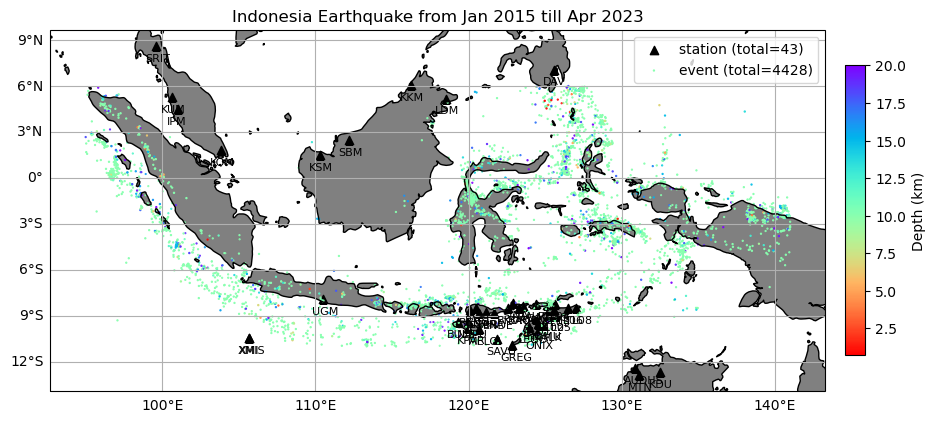

In [468]:
import matplotlib.axes as axes

metadata_sta = df_sta_av
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection=ccrs.PlateCarree()))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels=False
gl.right_labels=False

ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.COASTLINE)
stas = ax.scatter(metadata_sta.longitude, metadata_sta.latitude, transform=ccrs.PlateCarree(), color='k', marker='^', label=f'station (total={len(metadata_sta)})')
# Add station names using the annotate function
for i, station in enumerate(metadata_sta.station):
    ax.annotate(station, xy=(metadata_sta['longitude'][i], metadata_sta['latitude'][i]), xytext=(-8, -11), textcoords='offset points', fontsize=8)


evs = ax.scatter(df_ev.longitude, df_ev.latitude, transform=ccrs.PlateCarree(), s=.1*df_ev.magnitude, c=df_ev.depth, cmap='rainbow_r', label=f'event (total={len(df_ev)})')
plt.legend()
times = [starttime.strftime('%b %Y'), endtime.strftime('%b %Y')]
plt.title(f'Indonesia Earthquake from {times[0]} till {times[1]}')

# Manually create a new axis for the colorbar
cax = fig.add_axes([0.92, 0.35, 0.02, 0.29])

# Add the colorbar to the new axis
cbar = fig.colorbar(evs, cax=cax)
cbar.set_label('Depth (km)')


In [470]:
events_stations = []
for _, sta in df_sta_av.iterrows():
    se = sta.event_id if type(sta.event_id) != str else [int(s) for s in sta.event_id[1:-1].split(',')]
    for ev_id in se:
        events_stations.append((sta, df_ev[df_ev.id == ev_id].iloc[0])) 

len(events_stations)

16102

In [473]:
from obspy.taup import TauPyModel
import multiprocessing
import pandas as pd
import numpy as np
from obspy.geodetics import gps2dist_azimuth, locations2degrees
from tqdm import tqdm

tau = 'prem'
model = TauPyModel(model=tau)

def calculate_travel_time(sta, ev):
    dist = locations2degrees(ev.latitude, ev.longitude, sta.latitude, sta.longitude)
    p_arrivals = model.get_travel_times(source_depth_in_km=ev.depth, distance_in_degree=dist, phase_list=['P','p'])
    
    if len(p_arrivals) > 0:
        s_arrivals = model.get_travel_times(source_depth_in_km=ev.depth, distance_in_degree=dist, phase_list=['S','s'])

        if len(s_arrivals) > 0:
            p_ = min(p.time for p in p_arrivals)
            s_ = min(s.time for s in s_arrivals)
            coda_ = s_ + 1.4*(s_-p_) + (1/dist)

            origin_time = UTCDateTime(ev.origin_time)
            data = np.array([f'ev_{ev.id}.{sta.network}.{sta.station}', origin_time, origin_time + p_, origin_time + s_, origin_time + coda_, 
                             ev.latitude, ev.longitude, ev.depth, ev.magnitude, ev.magnitude_type, 
                             dist, sta.network, sta.station, sta.latitude, sta.longitude])
            return data
        else: 
            print(f'{ev.id} | {sta.station} not have s arrivals')
            return None
    else:
        print(f'{ev.id} | {sta.station} not have p arrivals')
        return None

columns = ['id', 'origin_time', 'p_arrival', 's_arrival', 'coda', 
            'event_latitude', 'event_longitude', 'event_depth', 'magnitude', 'magnitude_type', 
            'distance_in_degree', 'network', 'station', 'station_latitude', 'station_longitude']
if __name__=='__main__':
    # data = []
    # for sta, ev in tqdm(events_stations, f'get travel time on each events'):
    #     result = calculate_travel_time(sta, ev)
    #     if result is not None:
    #         data.append(result)

    df = pd.DataFrame(data, columns=columns)
    df = df.sort_values(['distance_in_degree', 'event_depth']).reset_index(drop=True)
    # df.to_csv(f'../data/indonesia/{year}.{endyear}.{maxdepth}.{maxrad}.chunk_ev.csv', index=False)

    # df = pd.read_csv(f'../data/indonesia/{year}.{endyear}.{maxdepth}.{maxrad}.chunk_ev.csv')

df

id                  origin_time  \
0       ev_5167325.YS.MTNG  2015-11-04T09:40:44.510000Z   
1       ev_5166447.YS.MTNG  2015-11-27T06:54:58.950000Z   
2       ev_5167274.YS.MTNG  2015-11-03T21:06:44.290000Z   
3       ev_5168773.YS.MTNG  2015-12-19T22:37:59.300000Z   
4       ev_5168206.YS.MTNG  2015-11-05T03:34:30.430000Z   
...                    ...                          ...   
16097   ev_9375668.YS.NAPU  2016-09-23T06:30:11.570000Z   
16098  ev_10828544.YS.TL06  2015-07-21T18:41:13.900000Z   
16099   ev_10957890.MY.LDM  2018-10-10T17:34:23.630000Z   
16100  ev_10580489.YS.BAOP  2015-01-16T10:39:54.500000Z   
16101  ev_11322596.YS.TL08  2020-10-09T02:57:20.764000Z   

                         p_arrival                    s_arrival  \
0      2015-11-04T09:40:46.273872Z  2015-11-04T09:40:47.707018Z   
1      2015-11-27T06:55:01.392575Z  2015-11-27T06:55:03.377167Z   
2      2015-11-03T21:06:46.366497Z  2015-11-03T21:06:48.053650Z   
3      2015-12-19T22:38:01.381670Z  2015-12-19T22:38:03.073027Z   
4      2015-11-05T03:34:33.569081Z  2015-11-05T03:34:36.095537Z   
...                            ...                          ...   
16097  2016-09-23T06:31:23.770963Z  2016-09-23T06:32:21.668316Z   
16098  2015-07-21T18:42:26.102470Z  2015-07-21T18:43:24.001037Z   
16099  2018-10-10T17:35:35.835273Z  2018-10-10T17:36:33.736100Z   
16100  2015-01-16T10:41:06.707132Z  2015-01-16T10:42:04.609458Z   
16101  2020-10-09T02:58:32.971166Z  2020-10-09T02:59:30.873519Z   

                              coda  event_latitude  event_longitude  \
0      2015-11-04T09:41:41.170367Z         -8.3162         125.1002   
1      2015-11-27T06:55:23.737215Z         -8.3414         125.1383   
2      2015-11-03T21:07:06.969373Z         -8.2945         125.1635   
3      2015-12-19T22:38:21.863266Z         -8.2498         125.0635   
4      2015-11-05T03:34:55.186583Z         -8.2520         125.0560   
...                            ...             ...              ...   
16097  2016-09-23T06:33:42.924631Z         -9.5252         124.9967   
16098  2015-07-21T18:44:45.259048Z         -3.5300         127.2200   
16099  2018-10-10T17:37:54.997265Z          1.2182         121.5563   
16100  2015-01-16T10:43:25.872716Z         -8.2800         118.2200   
16101  2020-10-09T03:00:52.136816Z         -6.0536         122.5915   

       event_depth  magnitude magnitude_type  distance_in_degree network  \
0            10.00        4.2             mb            0.019434      YS   
1            12.68        4.7             mb            0.056878      YS   
2            10.00        4.2             mb            0.060409      YS   
3            10.00        4.6             mb            0.060893      YS   
4            17.12        4.0             mb            0.064292      YS   
...            ...        ...            ...                 ...     ...   
16097        10.00        4.9             mb            4.999482      YS   
16098        10.00        2.4            MLv            4.999592      YS   
16099        10.00        4.9             mb            4.999797      MY   
16100        10.00        3.4            MLv            4.999933      YS   
16101        10.00        5.3            Mww            4.999936      YS   

      station  station_latitude  station_longitude  
0        MTNG           -8.2969         125.102500  
1        MTNG           -8.2969         125.102500  
2        MTNG           -8.2969         125.102500  
3        MTNG           -8.2969         125.102500  
4        MTNG           -8.2969         125.102500  
...       ...               ...                ...  
16097    NAPU           -9.3939         119.930000  
16098    TL06           -8.4718         126.457600  
16099     LDM            5.1777         118.498001  
16100    BAOP           -8.4882         123.269600  
16101    TL08           -8.4947         126.990800  

[16102 rows x 15 columns]

get and save to h5 each event waveforms:   0%|          | 0/16102 [00:00<?, ?it/s]

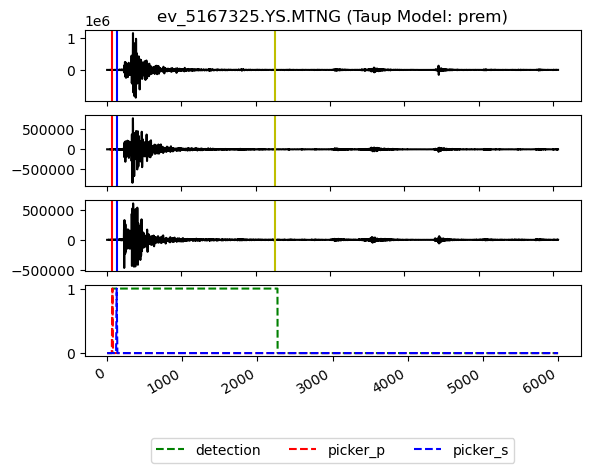

get and save to h5 each event waveforms:   1%|          | 100/16102 [05:05<16:24:43,  3.69s/it]

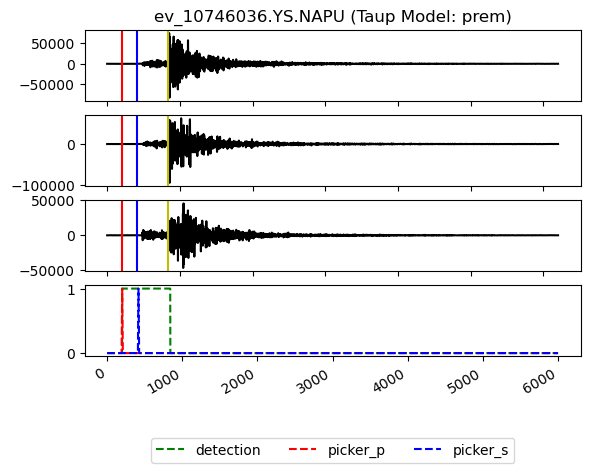

get and save to h5 each event waveforms:   1%|          | 200/16102 [09:22<5:26:01,  1.23s/it] 

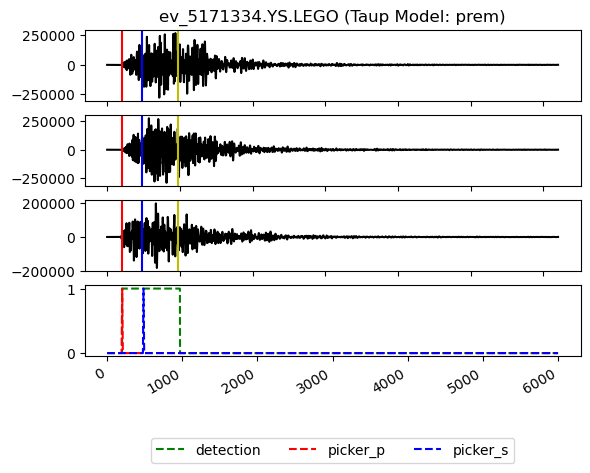

get and save to h5 each event waveforms:   2%|▏         | 300/16102 [13:47<3:58:59,  1.10it/s] 

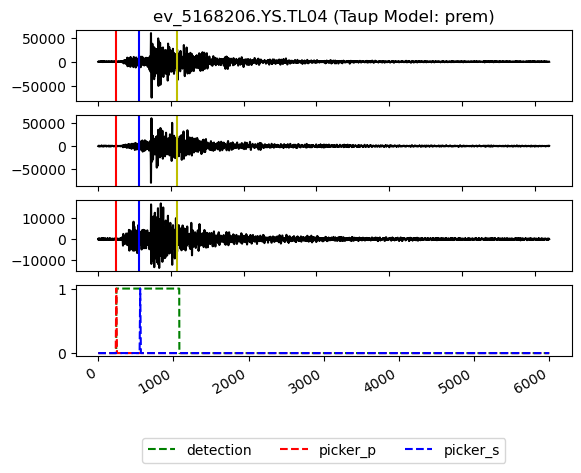

get and save to h5 each event waveforms:   5%|▍         | 800/16102 [37:07<10:50:43,  2.55s/it] 

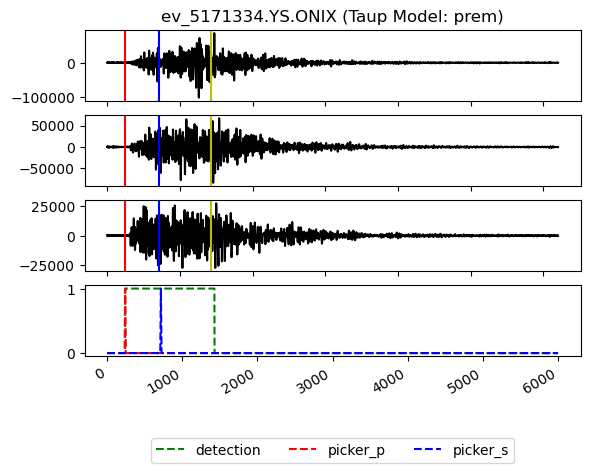

get and save to h5 each event waveforms:   7%|▋         | 1100/16102 [46:08<7:33:09,  1.81s/it] 

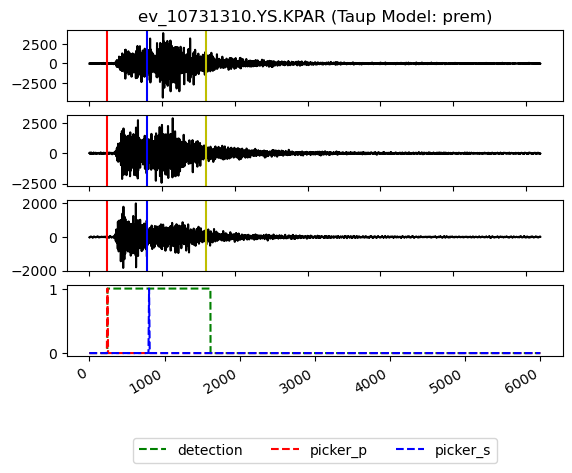

get and save to h5 each event waveforms:   7%|▋         | 1200/16102 [49:03<4:25:06,  1.07s/it] 

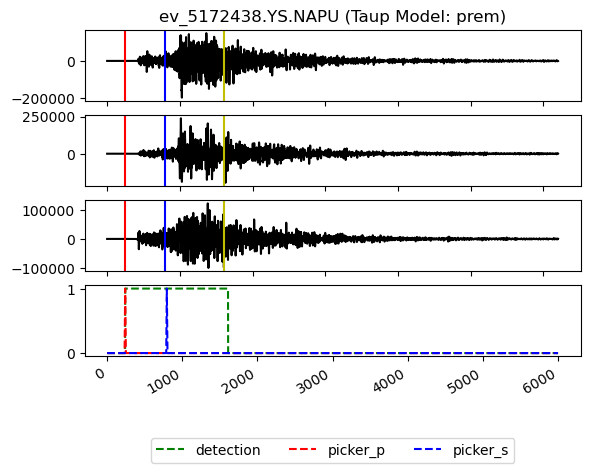

get and save to h5 each event waveforms:  10%|▉         | 1600/16102 [59:27<7:28:14,  1.85s/it] 

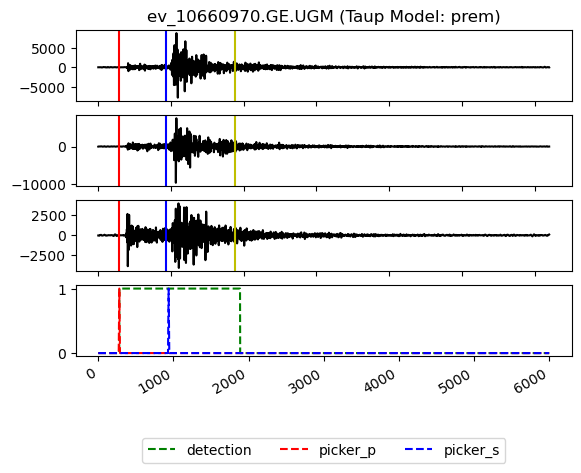

get and save to h5 each event waveforms:  11%|█         | 1800/16102 [1:04:24<3:36:20,  1.10it/s] 

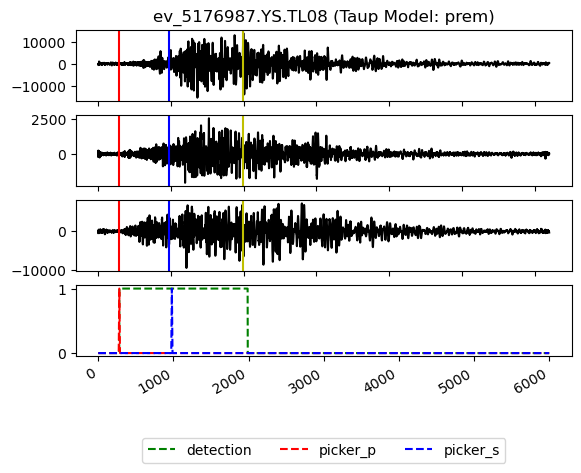

get and save to h5 each event waveforms:  12%|█▏        | 2000/16102 [1:11:02<12:04:05,  3.08s/it]

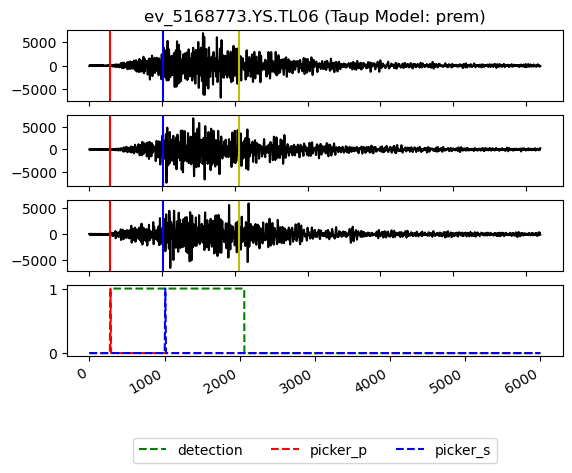

get and save to h5 each event waveforms:  13%|█▎        | 2100/16102 [1:13:57<5:43:43,  1.47s/it] 

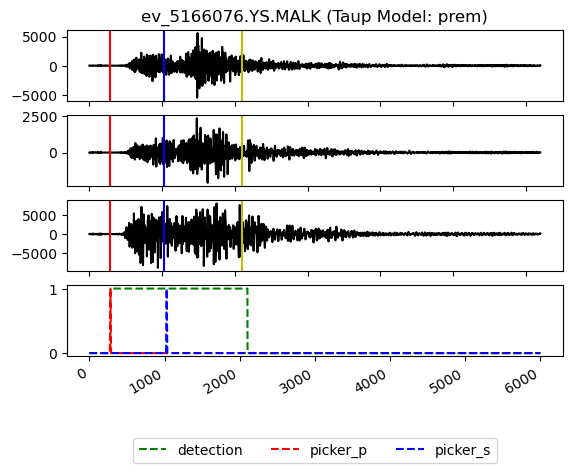

get and save to h5 each event waveforms:  14%|█▍        | 2300/16102 [1:19:48<10:47:23,  2.81s/it]

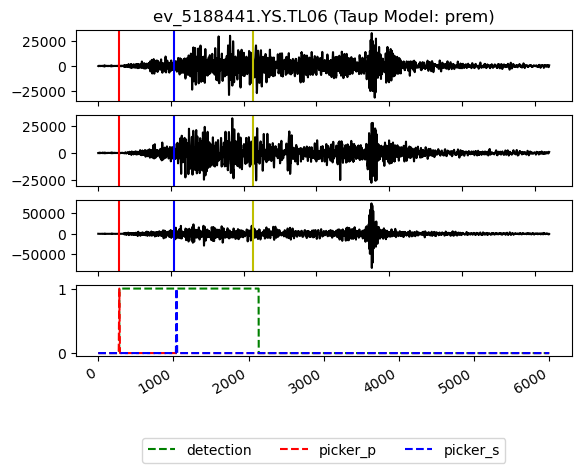

get and save to h5 each event waveforms:  16%|█▌        | 2500/16102 [1:25:02<4:56:04,  1.31s/it] 

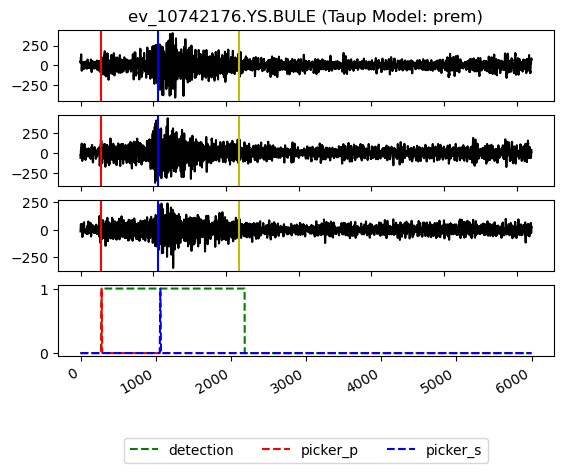

get and save to h5 each event waveforms:  17%|█▋        | 2700/16102 [1:30:03<5:25:35,  1.46s/it] 

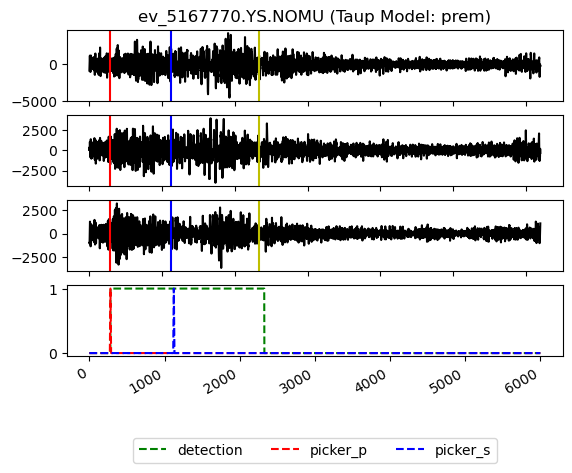

get and save to h5 each event waveforms:  19%|█▊        | 3000/16102 [1:36:33<4:29:49,  1.24s/it]

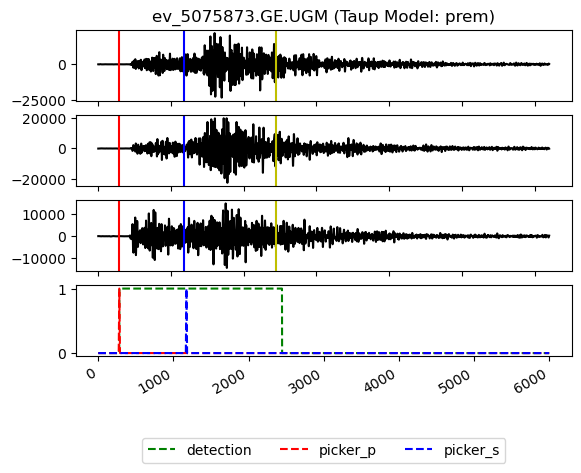

get and save to h5 each event waveforms:  24%|██▍       | 3900/16102 [1:56:14<6:37:37,  1.96s/it] 

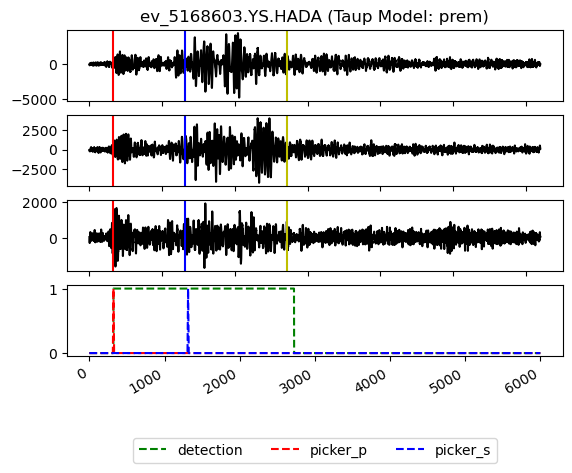

get and save to h5 each event waveforms:  25%|██▌       | 4100/16102 [2:01:01<6:46:54,  2.03s/it]

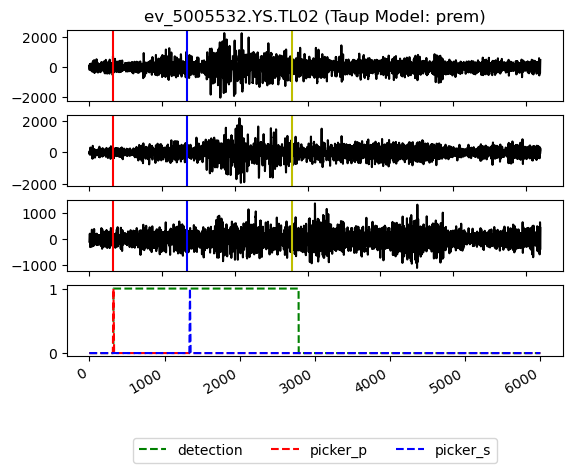

get and save to h5 each event waveforms:  26%|██▌       | 4200/16102 [2:03:13<5:26:45,  1.65s/it]

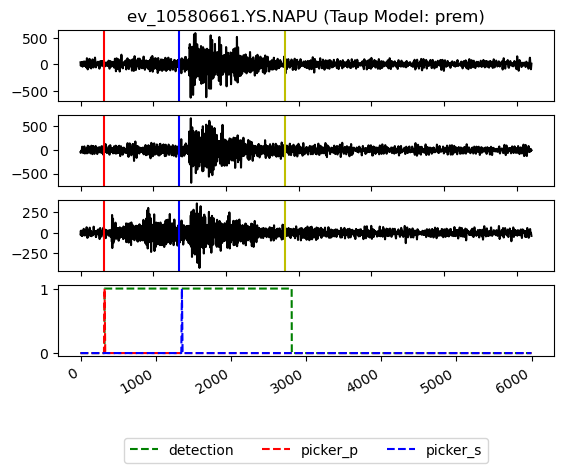

get and save to h5 each event waveforms:  29%|██▊       | 4600/16102 [2:12:37<3:46:35,  1.18s/it]

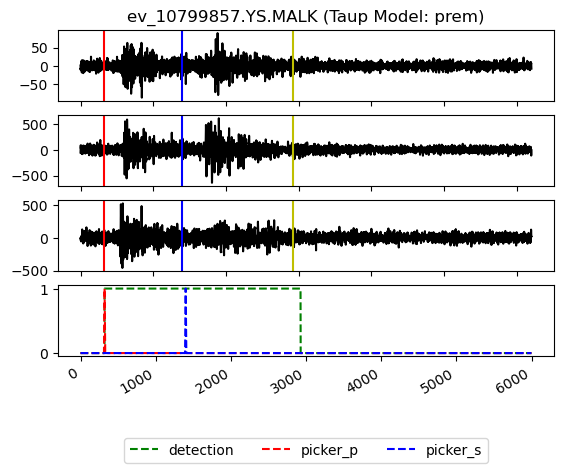

get and save to h5 each event waveforms:  29%|██▉       | 4700/16102 [2:14:42<3:10:59,  1.01s/it]

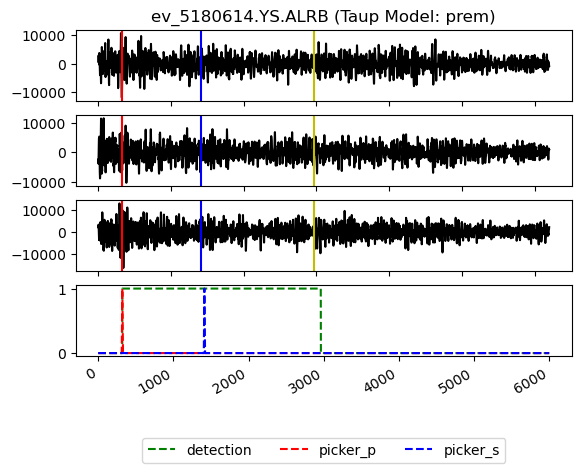

get and save to h5 each event waveforms:  32%|███▏      | 5100/16102 [2:24:29<3:20:37,  1.09s/it]

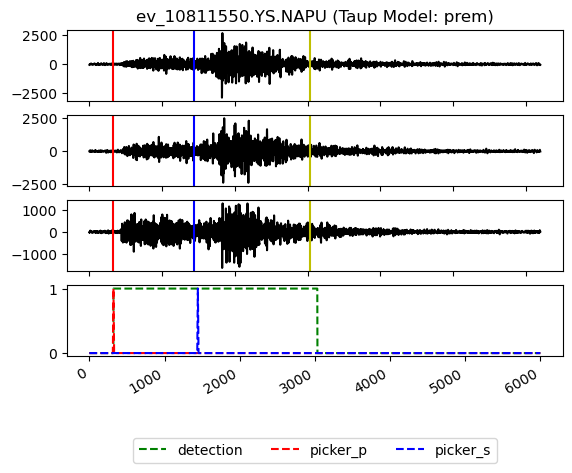

get and save to h5 each event waveforms:  33%|███▎      | 5300/16102 [2:28:56<4:29:03,  1.49s/it]

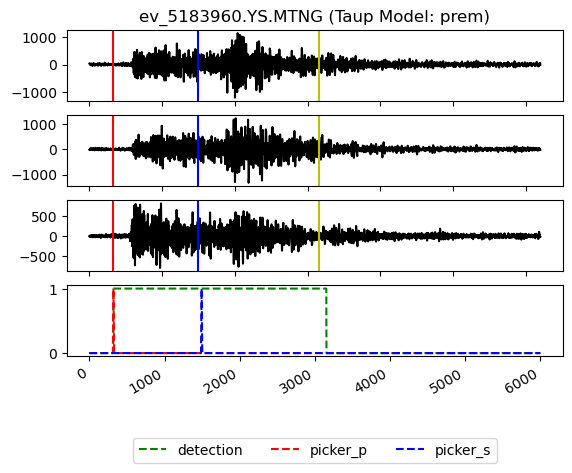

get and save to h5 each event waveforms:  34%|███▎      | 5400/16102 [2:31:13<4:21:21,  1.47s/it]

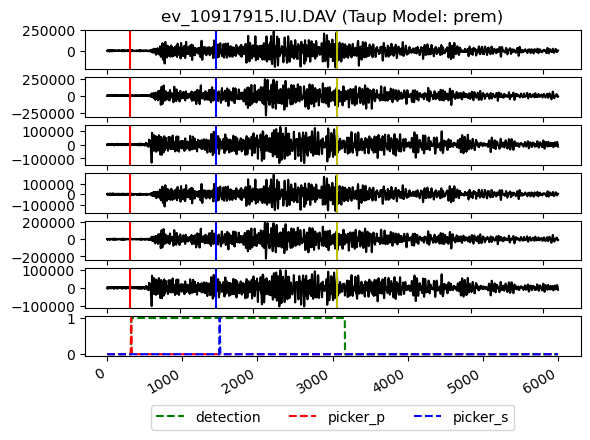

get and save to h5 each event waveforms:  35%|███▍      | 5600/16102 [2:35:33<2:57:49,  1.02s/it]

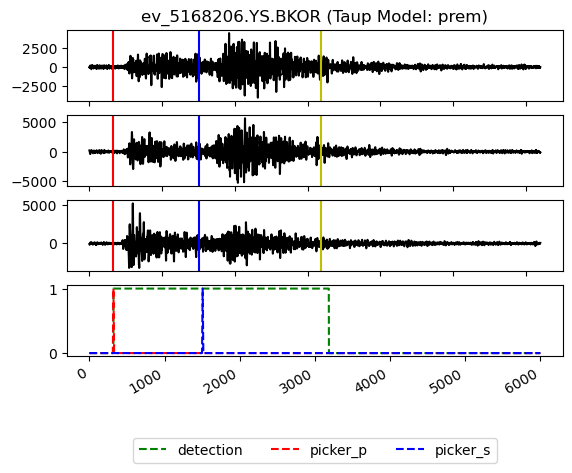

get and save to h5 each event waveforms:  39%|███▊      | 6200/16102 [2:47:38<2:22:35,  1.16it/s]

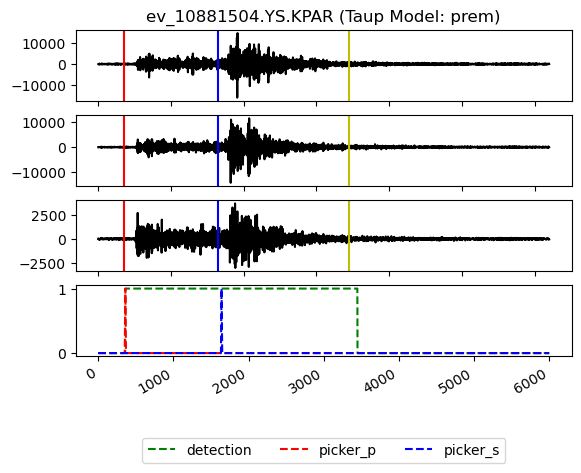

get and save to h5 each event waveforms:  39%|███▉      | 6300/16102 [2:49:41<3:35:04,  1.32s/it]

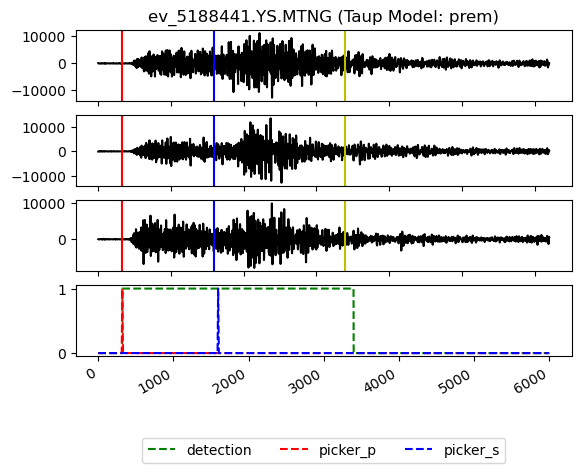

get and save to h5 each event waveforms:  42%|████▏     | 6800/16102 [2:59:21<3:18:53,  1.28s/it]

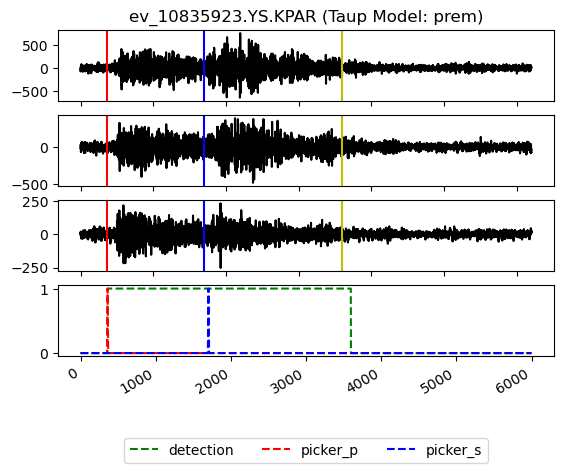

get and save to h5 each event waveforms:  43%|████▎     | 7000/16102 [3:03:23<4:01:09,  1.59s/it]

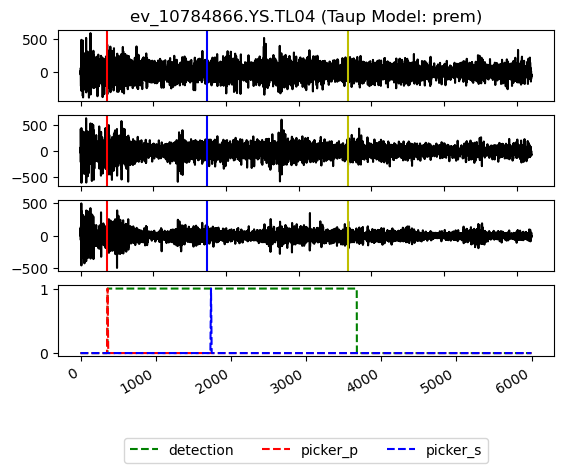

get and save to h5 each event waveforms:  44%|████▍     | 7100/16102 [3:05:11<2:02:01,  1.23it/s]

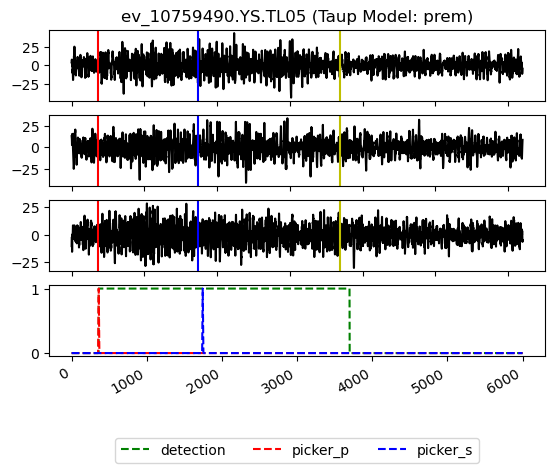

get and save to h5 each event waveforms:  45%|████▍     | 7200/16102 [3:07:23<2:04:16,  1.19it/s]

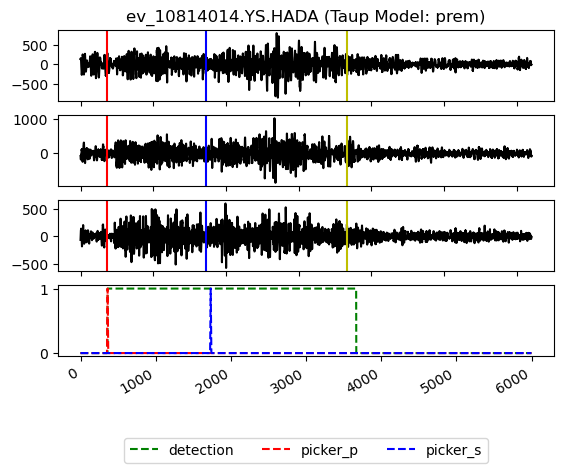

get and save to h5 each event waveforms:  47%|████▋     | 7500/16102 [3:12:54<4:25:23,  1.85s/it]

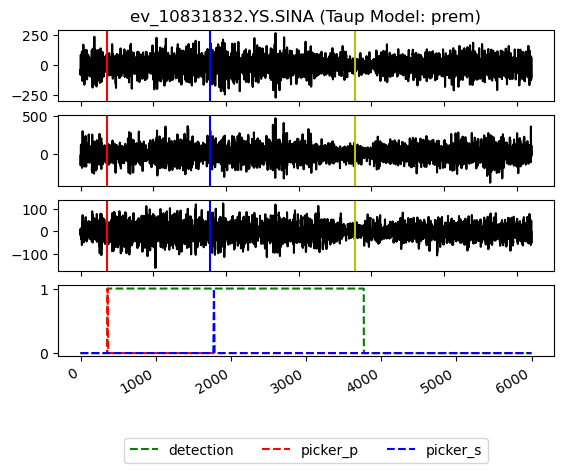

get and save to h5 each event waveforms:  47%|████▋     | 7600/16102 [3:14:52<1:55:53,  1.22it/s]

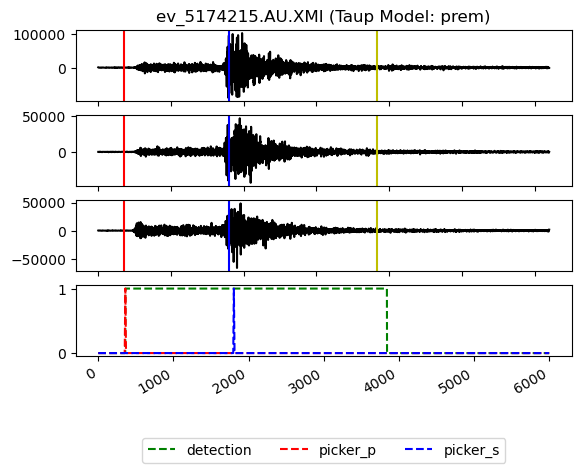

get and save to h5 each event waveforms:  48%|████▊     | 7800/16102 [3:19:03<4:45:44,  2.07s/it]

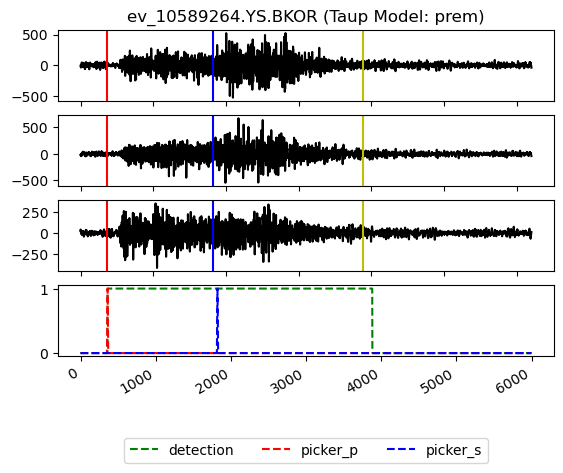

get and save to h5 each event waveforms:  52%|█████▏    | 8400/16102 [3:31:05<1:39:52,  1.29it/s]

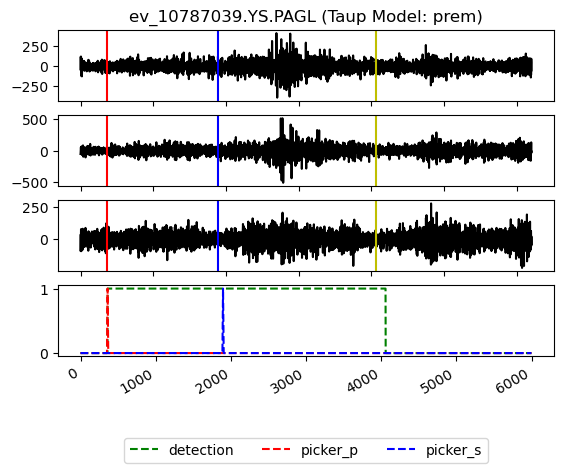

get and save to h5 each event waveforms:  57%|█████▋    | 9100/16102 [3:44:46<1:39:48,  1.17it/s]

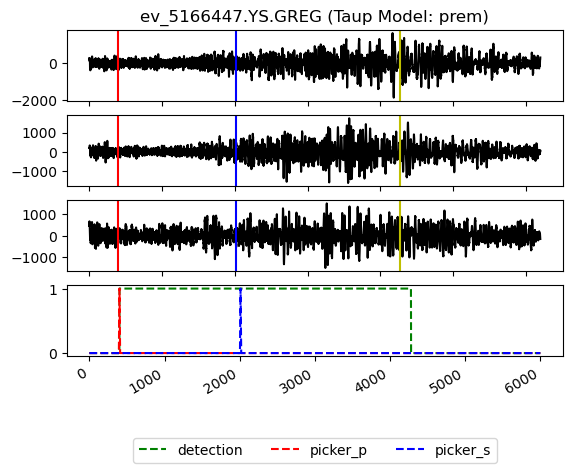

get and save to h5 each event waveforms:  57%|█████▋    | 9200/16102 [3:46:55<2:36:15,  1.36s/it] 

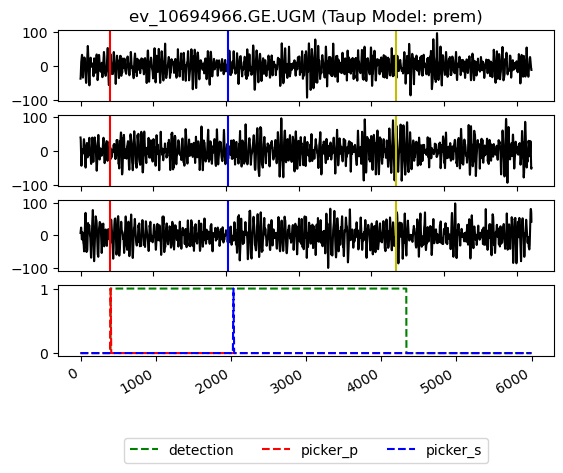

get and save to h5 each event waveforms:  59%|█████▉    | 9500/16102 [3:52:50<2:06:28,  1.15s/it]

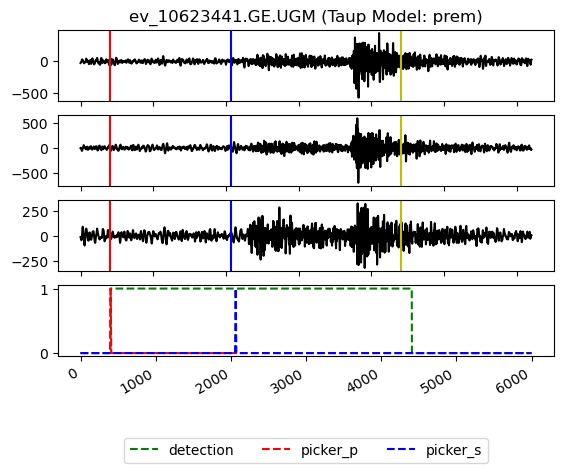

get and save to h5 each event waveforms:  68%|██████▊   | 11000/16102 [4:22:35<1:13:12,  1.16it/s]

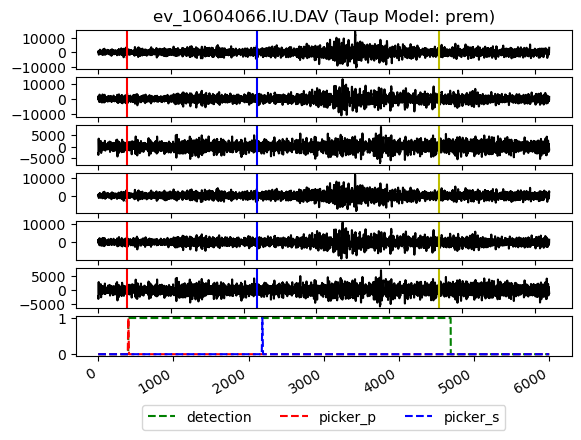

get and save to h5 each event waveforms:  69%|██████▉   | 11100/16102 [4:24:33<1:55:21,  1.38s/it]

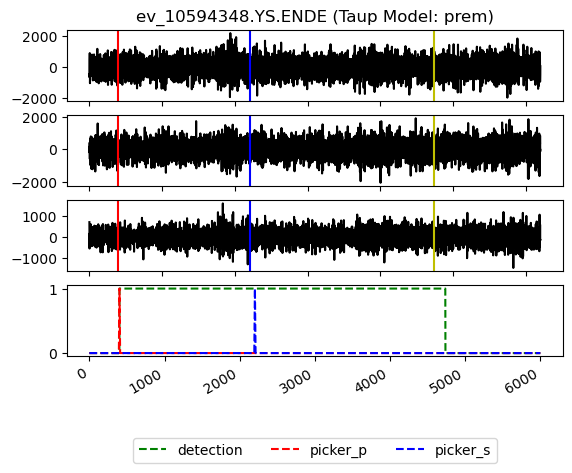

get and save to h5 each event waveforms:  72%|███████▏  | 11600/16102 [4:33:53<1:19:45,  1.06s/it]

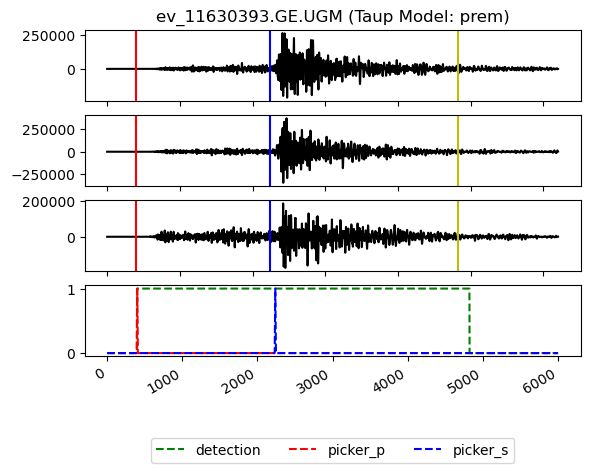

get and save to h5 each event waveforms:  74%|███████▍  | 11900/16102 [4:39:50<1:05:31,  1.07it/s]

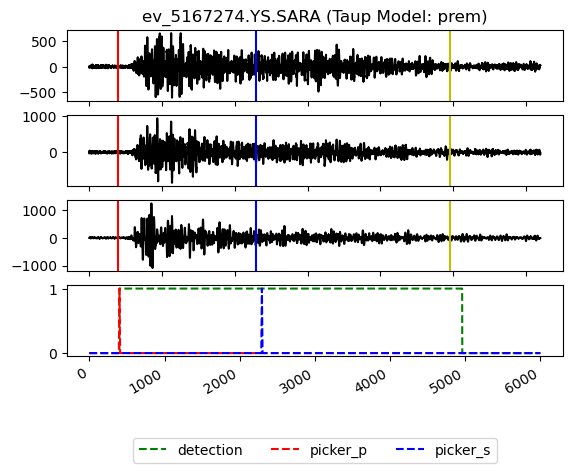

get and save to h5 each event waveforms:  78%|███████▊  | 12600/16102 [4:54:21<1:04:03,  1.10s/it]

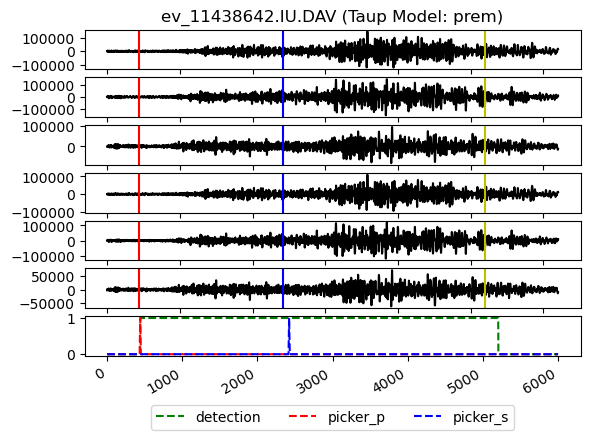

get and save to h5 each event waveforms:  81%|████████  | 13000/16102 [5:02:34<56:43,  1.10s/it]  

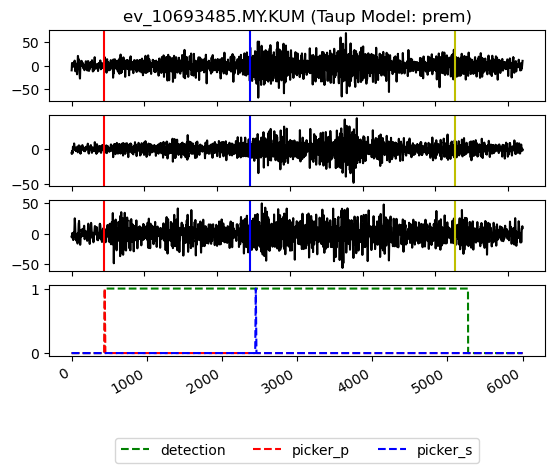

get and save to h5 each event waveforms:  81%|████████▏ | 13100/16102 [5:04:29<43:08,  1.16it/s]  

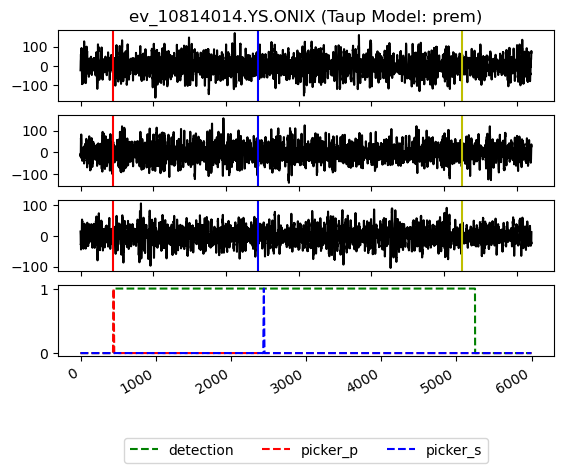

get and save to h5 each event waveforms:  83%|████████▎ | 13400/16102 [5:10:48<40:47,  1.10it/s]  

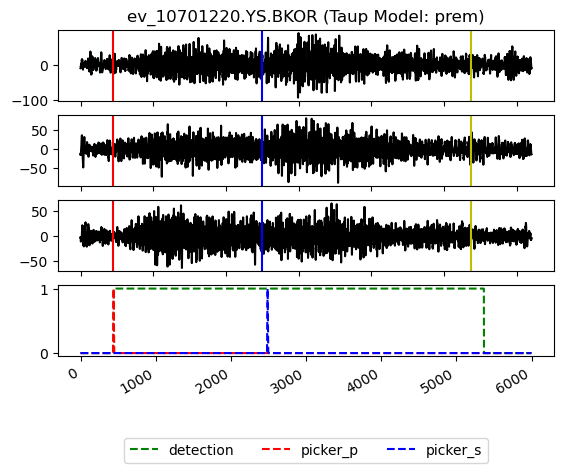

get and save to h5 each event waveforms:  86%|████████▌ | 13800/16102 [5:19:21<37:28,  1.02it/s]  

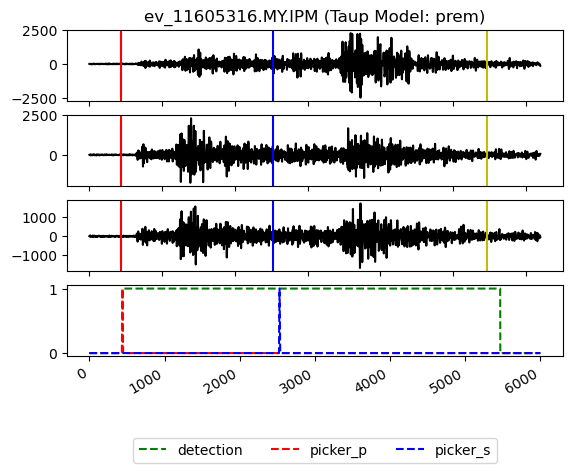

get and save to h5 each event waveforms:  89%|████████▉ | 14400/16102 [5:31:59<25:16,  1.12it/s]  

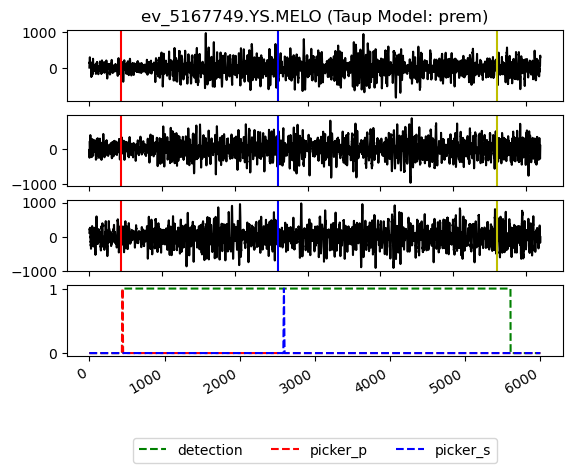

get and save to h5 each event waveforms:  91%|█████████ | 14600/16102 [5:36:34<41:37,  1.66s/it]  

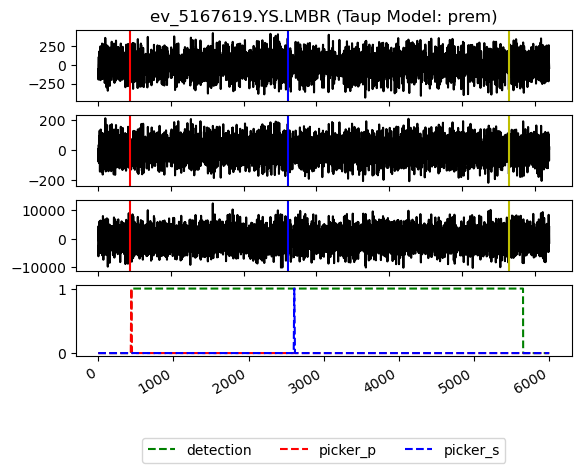

get and save to h5 each event waveforms:  92%|█████████▏| 14800/16102 [5:41:02<42:08,  1.94s/it]

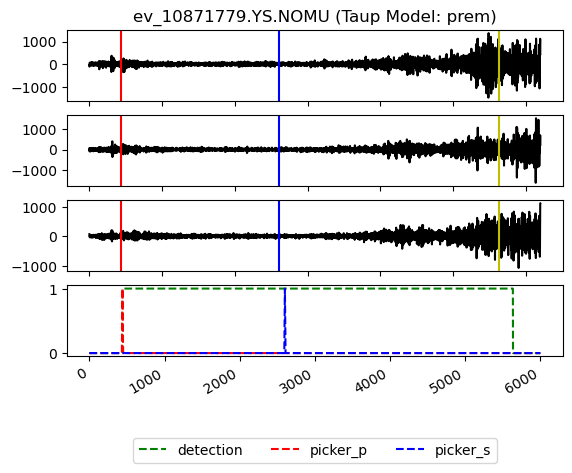

get and save to h5 each event waveforms:  94%|█████████▍| 15200/16102 [5:50:05<27:34,  1.83s/it]

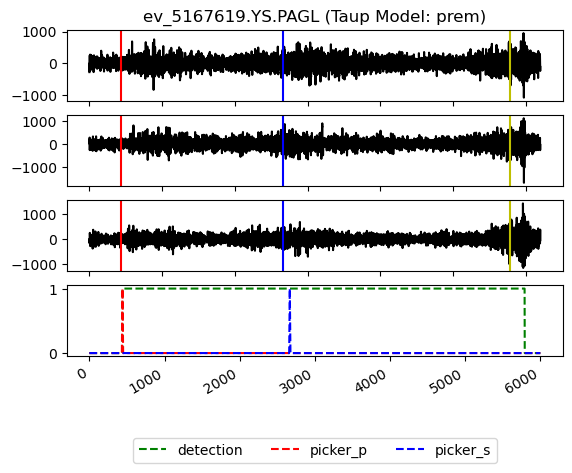

get and save to h5 each event waveforms:  95%|█████████▌| 15300/16102 [5:52:28<18:40,  1.40s/it]

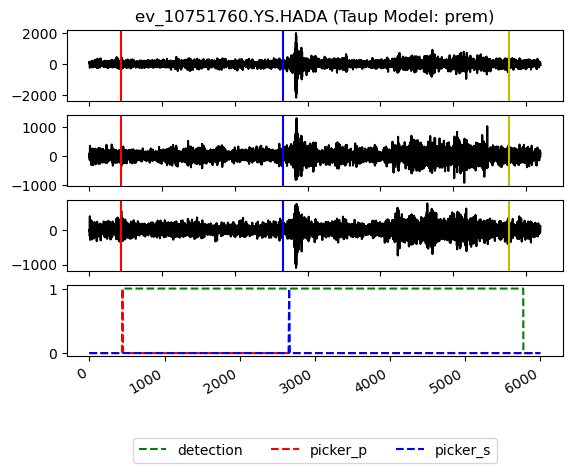

get and save to h5 each event waveforms:  97%|█████████▋| 15600/16102 [5:59:32<08:57,  1.07s/it]

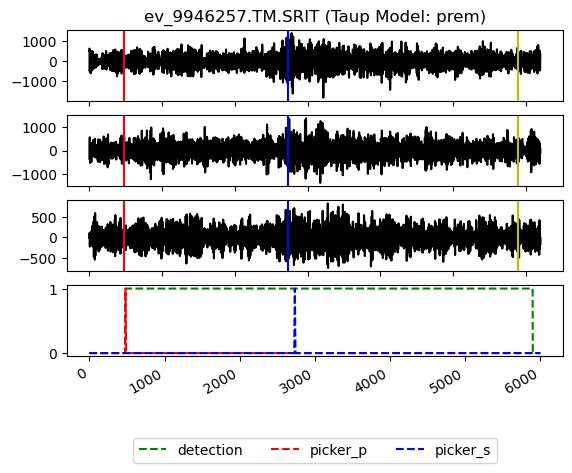

get and save to h5 each event waveforms:  98%|█████████▊| 15700/16102 [6:01:39<08:10,  1.22s/it]

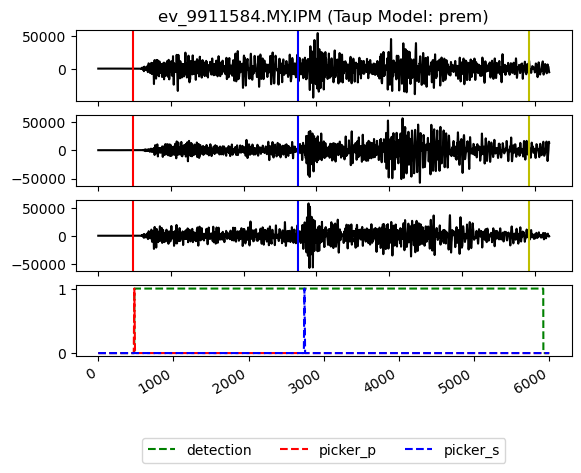

get and save to h5 each event waveforms:  99%|█████████▊| 15900/16102 [6:06:45<05:08,  1.53s/it]

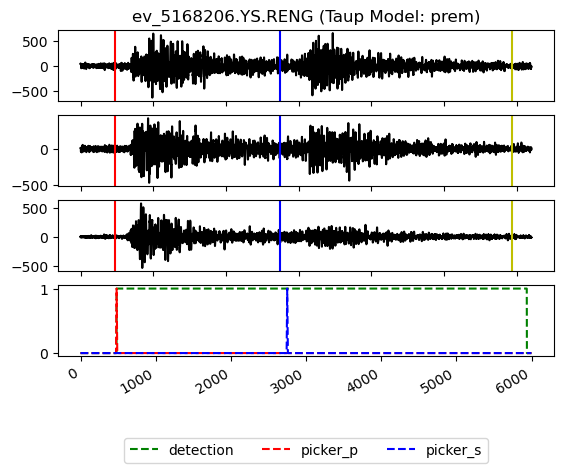

get and save to h5 each event waveforms: 100%|█████████▉| 16100/16102 [6:11:09<00:04,  2.03s/it]

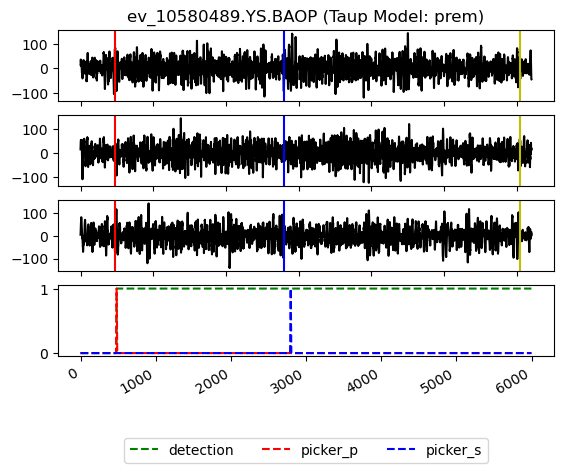

get and save to h5 each event waveforms: 100%|██████████| 16102/16102 [6:11:13<00:00,  1.38s/it]


In [482]:
import h5py, os
from datetime import datetime
from retrying import retry
import logging

@retry(
    wait_random_min=2000, wait_random_max=5000, 
    stop_max_attempt_number=3, 
    retry_on_exception=lambda e: isinstance(e, Exception) and "URLError" in str(e))
def get_waveform(**kwargs):
    st = client.get_waveforms(**kwargs)
    return st

new_data = []
new_columns = [*columns, *['starttime', 'endtime', 'p_', 's_', 'coda_', 'component']]
TIMESTEPS = 6000
PLOTSTEP = 100
h5_path = f'../data/indonesia/{year}.{endyear}.{maxdepth}.{maxrad}.chunk_indo.hdf5'

logging.basicConfig(filename='status.log', level=logging.DEBUG, filemode='w')
logging.shutdown()

rendered_data = list(df.iterrows())
except_events = []
n = 1
with h5py.File(h5_path, 'w') as h5:
    for e, evs in tqdm(rendered_data, 'get and save to h5 each event waveforms'):
        try:
            kwargs = dict(
                    network=evs.network, station=evs.station, location="*",
                    channel='BH?', starttime=evs.origin_time, endtime=evs.coda+160
                    )
            st = get_waveform(**kwargs)
            sr = st[0].stats.sampling_rate
            
            if sr != 40:
                st.resample(40)
            assert len(st)%3 == 0, f'{evs.id} | this data have {len(st)} traces, cannot split to 3 component'
            
            if (len(st)%3 == 0):
                st.detrend("linear")
                st.filter('bandpass', freqmin=1, freqmax=18)

                duration = (st[0].stats.endtime - st[0].stats.starttime)
                p_arr = evs.p_arrival
                s_arr = evs.s_arrival
                
                start_trim = p_arr - 5 - ((evs.p_arrival - evs.origin_time) // 10)
                end_trim = start_trim + 5 + (TIMESTEPS+1)/40

                st.trim(start_trim, end_trim)
                assert st[0].stats.npts >= 6000, f'{evs.id} | this data just trim to {st[0].stats.npts} sample'

                times = st[0].times('timestamp')
                p_ = np.abs(times-p_arr.timestamp).argmin()
                s_ = np.abs(times-s_arr.timestamp).argmin()
                coda_ = np.abs(times-evs.coda.timestamp).argmin()

                pp = np.zeros((TIMESTEPS,))
                sp = np.zeros((TIMESTEPS,))
                eqp = np.zeros((TIMESTEPS,))
                
                # Set the values of eqp to 1 between p_ and coda_
                eqp[p_:coda_+1] = 1.

                n = 8
                # Calculate the triangular waveform for pp
                pp[p_-n:p_+1] = np.linspace(0,1,n+1)
                pp[p_:p_+n+1] = np.linspace(1,0,n+1)
                
                # Calculate the triangular waveform for sp
                sp[s_-n:s_+1] = np.linspace(0,1,n+1)
                sp[s_:s_+n+1] = np.linspace(1,0,n+1)

                for s in range(len(st)//3):
                    new_evs = evs.copy()
                    new_evs.id = f'{evs.id}.{st[s*3].stats.location}'
                    tr3 = st[s*3:(s+1)*3]
                    channel = ','.join([t.stats.channel for t in tr3])

                    new_values = np.array([*new_evs.values, *[st[0].stats.starttime,st[0].stats.endtime, p_, s_, coda_, channel]])
                    new_data.append(new_values)

                    data_ = np.array([t.data for t in tr3])
                    out_ = np.array([pp,sp,eqp])
                    dset = h5.create_dataset(f'{new_evs.id}/data', data=data_[:6000], chunks=True, compression='gzip')
                    oset = h5.create_dataset(f'{new_evs.id}/output', data=out_, chunks=True, compression='gzip')

                    time_key = ['origin_time','p_arrival','s_arrival','coda','starttime','endtime']
                    for key, val in zip(new_columns, new_values):
                        dset.attrs[key] = val if key not in time_key else str(val)
                
                logging.info(f'{UTCDateTime(datetime.now())} - {n}. {evs.id} | Success to render data')
                n++
                # plot random data
                if (e in np.arange(0, len(df), PLOTSTEP)):
                    fig, ax = plt.subplots(len(st)+1)
                    ax[0].set_title(f'{evs.id} (Taup Model: {tau})')
                    for i, tr in enumerate(st):
                        ax[i].plot(tr.data, 'k')
                        ax[i].axvline(x=p_, color='r')
                        ax[i].axvline(x=s_, color='b')
                        ax[i].axvline(x=coda_, color='y')

                    ax[len(st)].plot(eqp, 'g--', label='detection')
                    ax[len(st)].plot(pp, 'r--', label='picker_p')
                    ax[len(st)].plot(sp, 'b--', label='picker_s')
                    fig.autofmt_xdate()
                    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -1.05), ncol=3)
                    plt.show()
            
        except Exception as e:
            except_events.append(evs.id)
            logging.error(f'{UTCDateTime(datetime.now())} - {e}. {evs.id} | {e}')

df_indo = pd.DataFrame(new_data, columns=new_columns)
df_indo.to_csv(f'../data/indonesia/{year}.{endyear}.{maxdepth}.{maxrad}.metadata_indo.csv', index=False)

file_handler = logging.FileHandler('status.log')
file_handler.close()

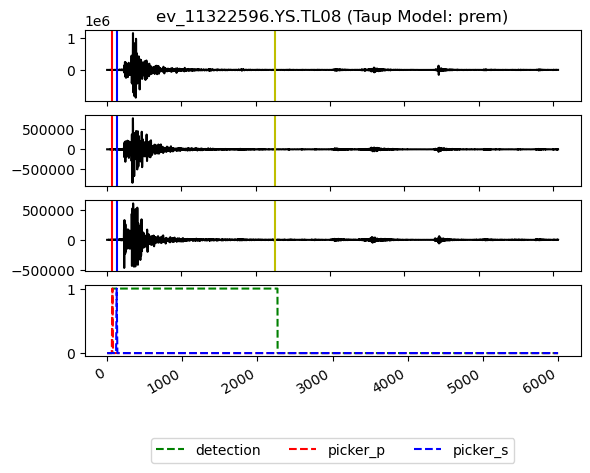

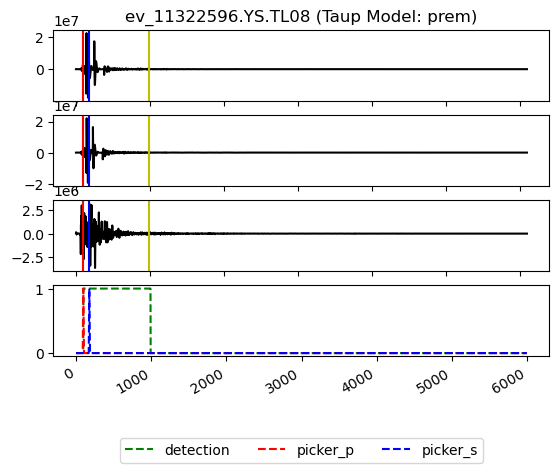

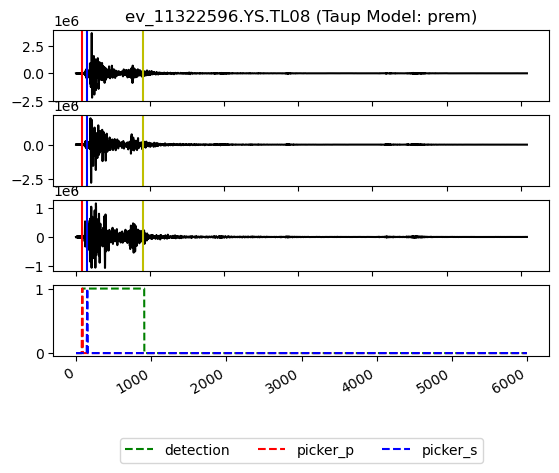

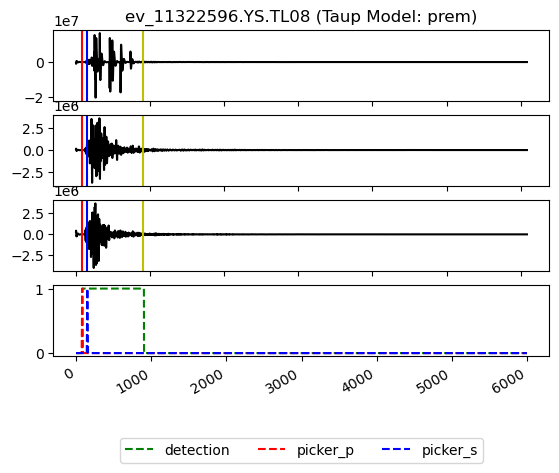

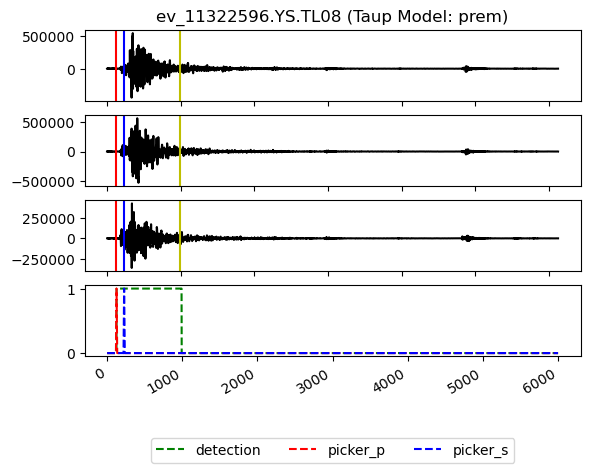

In [547]:
metadata = pd.read_csv(f'../data/indonesia/{year}.{endyear}.{maxdepth}.{maxrad}.metadata_indo.csv')

for i, id in enumerate(metadata.id[:5]):
    with h5py.File(h5_path, 'r') as r:
        try:
            dt = r.get(id)
            data = dt['data']
            output = dt['output']

            fig, ax = plt.subplots(4)

            ax[0].set_title(f'{evs.id} (Taup Model: {tau})')
            for i, tr in enumerate(data):
                lines = ax[i].plot(tr, 'k')
                picker_p = ax[i].axvline(x=data.attrs['p_'], color='r')
                picker_s = ax[i].axvline(x=data.attrs['s_'], color='b')
                picker_coda = ax[i].axvline(x=data.attrs['coda_'], color='y')

            prob_eq = ax[len(data)].plot(output[2], 'g--', label='detection')
            prob_eq = ax[len(data)].plot(output[0], 'r--', label='picker_p')
            prob_eq = ax[len(data)].plot(output[1], 'b--', label='picker_s')
            fig.autofmt_xdate()
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, -1.05), ncol=3)
            plt.show()
            # fig.canvas.draw()
            # display.clear_output(wait=True)
            # display.display(fig)

            # time.sleep(0.1)
        except Exception as e:
            logging.error(f'{i}. {id} | {e}')
        
